# Visualizing the latent space of the decoder

#### Intermediate report (04/23/19) 

The input to the decoder (decoderBVAE_like_wElu_SigmoidOutput) is a 4D vector encoding:

- x center of gaussian background blob
- y center of gaussian background blob
- x center of foreground circle object
- y center of foreground circle object

Let's visualize the effect of sweeping the latent space.

Training on 1M batches of 64 images each.

4 layers of transposed convolution with elus, the last output layer has a sigmoid non-linearity


### Results Summary

Training appears successful.

Observations:
#### the decoder architecture works well with a sigmoid output

This experiment was run to compare the results against the staticVAE (with sigmoid output) case, in which the foreground ball seemed to be blurry in many cases. 

The results here demonstrate, that a decoder with sigmoid output can produce sharp edges and very good reconstructions. Hence, the blurriness of the staticVAE results is not due to the sigmoid output.

#### Minor issue: Gaussian background blob coordinates

The gaussian center coordinate seem to have changed (Andrew?) (from a range of 0 to 2?). This does not affect the results though.

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

from models.decoders import decoderBVAE_like_wElu_SigmoidOutput

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

Load the trained model

In [8]:
model = decoderBVAE_like_wElu_SigmoidOutput().to(device)

checkpoint = torch.load('trained/decoderbvae_like_welu_sigmoidoutput_dsprites_circle_last_1M')
model.load_state_dict(checkpoint['model_states']['net'])

training_stats = pickle.load(open('trained/decoderbvae_like_welu_sigmoidoutput_dsprites_circle_1Mbatches.pkl', 'rb'))


## Training Loss

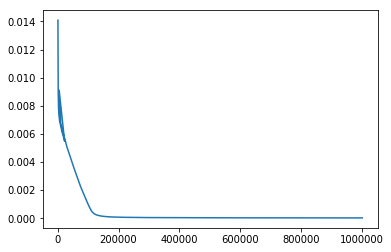

In [10]:
plt.plot(training_stats['iter'], training_stats['recon_loss'])

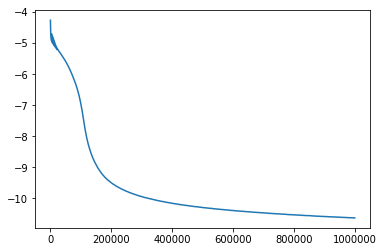

In [11]:
# Log Loss

plt.plot(training_stats['iter'], np.log(training_stats['recon_loss']))

## Visualization

Latents varied bw 0 and 1 (corners of the image). 

Here, we also look what happens if latents are beyond the trained range.

In [30]:
n_grid = 8

x = np.linspace(-.5, 2.5, n_grid)
y = np.linspace(-.5, 2.5, n_grid)

xv, yv = np.meshgrid(x,y, sparse = False)

### Moving the center of the gaussian background blob

The decoder seems to have learned to move the gaussian blob accordingly (even beyond the trained range)

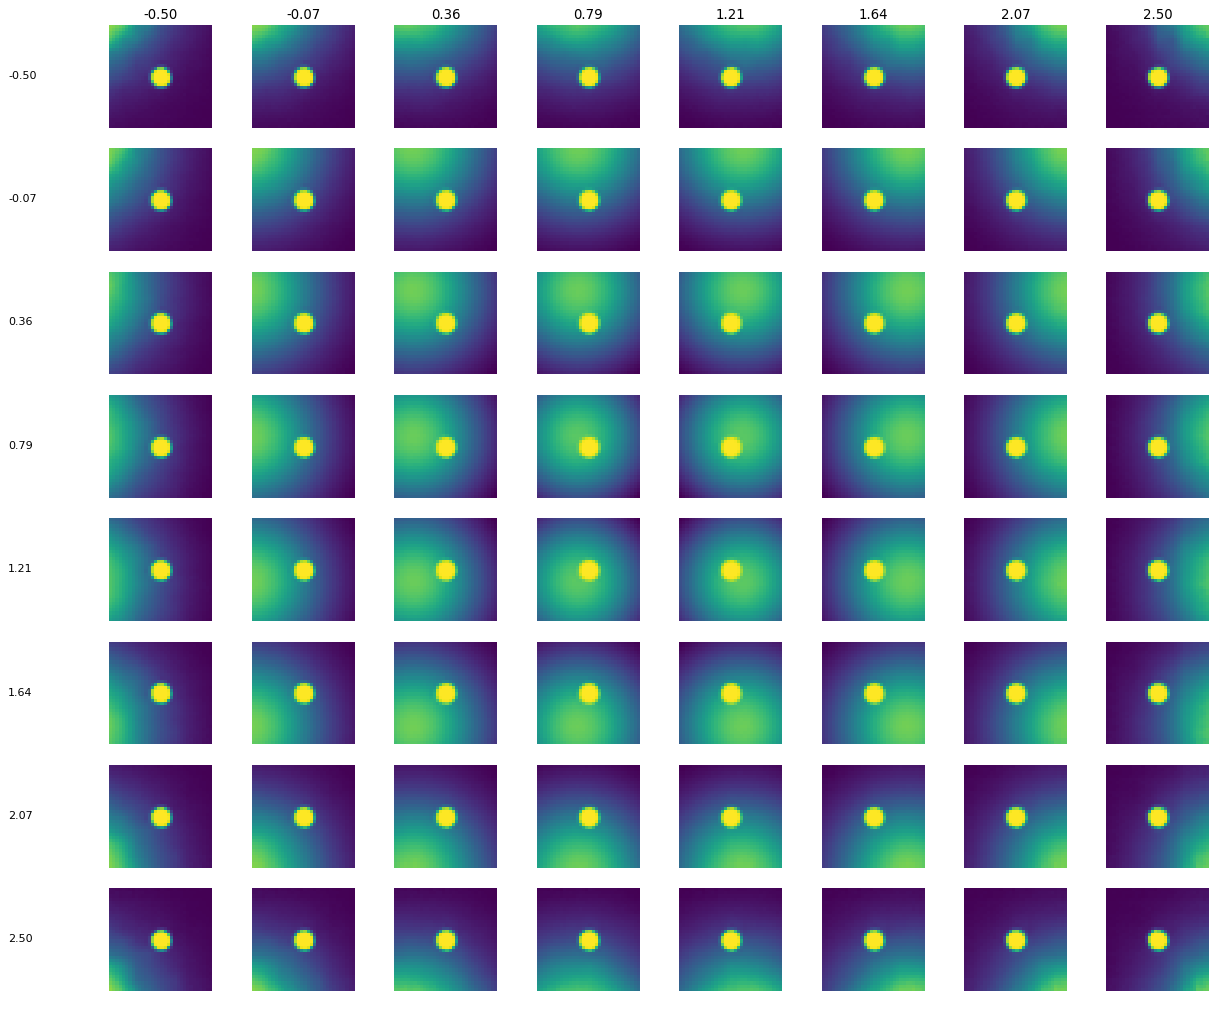

In [31]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

latents = torch.Tensor(1,4).to(device)
latents[0, :2] = torch.Tensor([.5, .5])
for ii in range(n_grid):
    for jj in range(n_grid):
        latents[0, 2:] = torch.Tensor([xv[ii,jj], yv[ii,jj]])
        
        plt.subplot(n_grid, n_grid, ii*n_grid + jj + 1)
        plt.imshow(model(latents).detach().cpu().numpy().squeeze())
        plt.axis('off')
        if ii == 0:
            plt.title('%0.2f' % y[jj])
        if jj == 0:
            plt.text(-32, 16, '%0.2f' % x[ii])      

### Moving the center of the circle object

The decoder seems to have learned to move the foreground circle object.

Beyond the training range, it still wants to place the object 'energy' somewhere (instaed of no output).

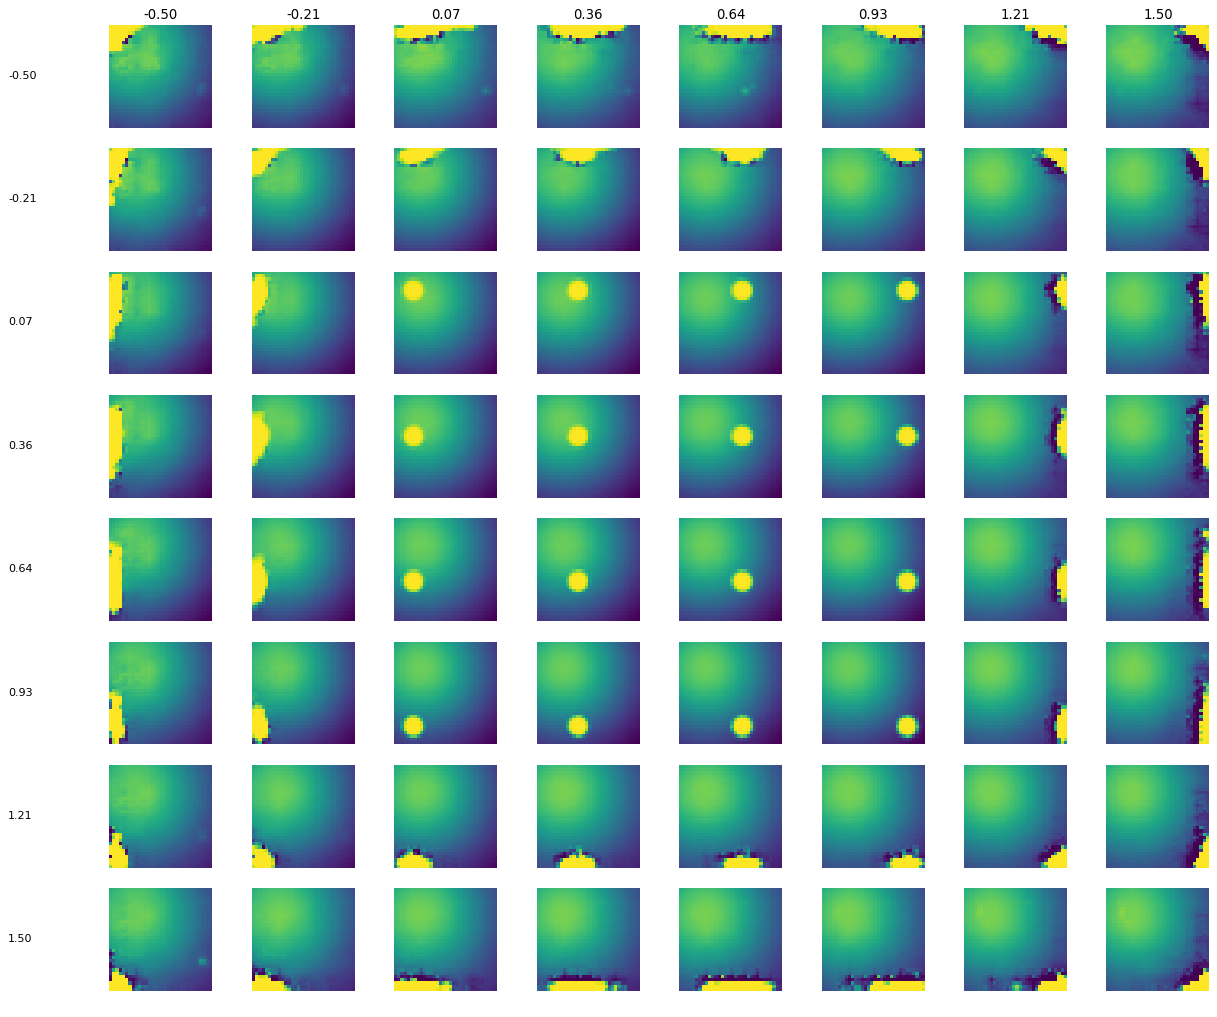

In [20]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

latents = torch.Tensor(1,4).to(device)
latents[0, 2:] = torch.Tensor([.5, .5])
for ii in range(n_grid):
    for jj in range(n_grid):
        latents[0, :2] = torch.Tensor([xv[ii,jj], yv[ii,jj]])
        
        plt.subplot(n_grid, n_grid, ii*n_grid + jj + 1)
        plt.imshow(model(latents).detach().cpu().numpy().squeeze())
        plt.axis('off')
        if ii == 0:
            plt.title('%0.2f' % y[jj])
        if jj == 0:
            plt.text(-32, 16, '%0.2f' % x[ii])

#### more finegrained object motion

Diagonal traversal across image space.

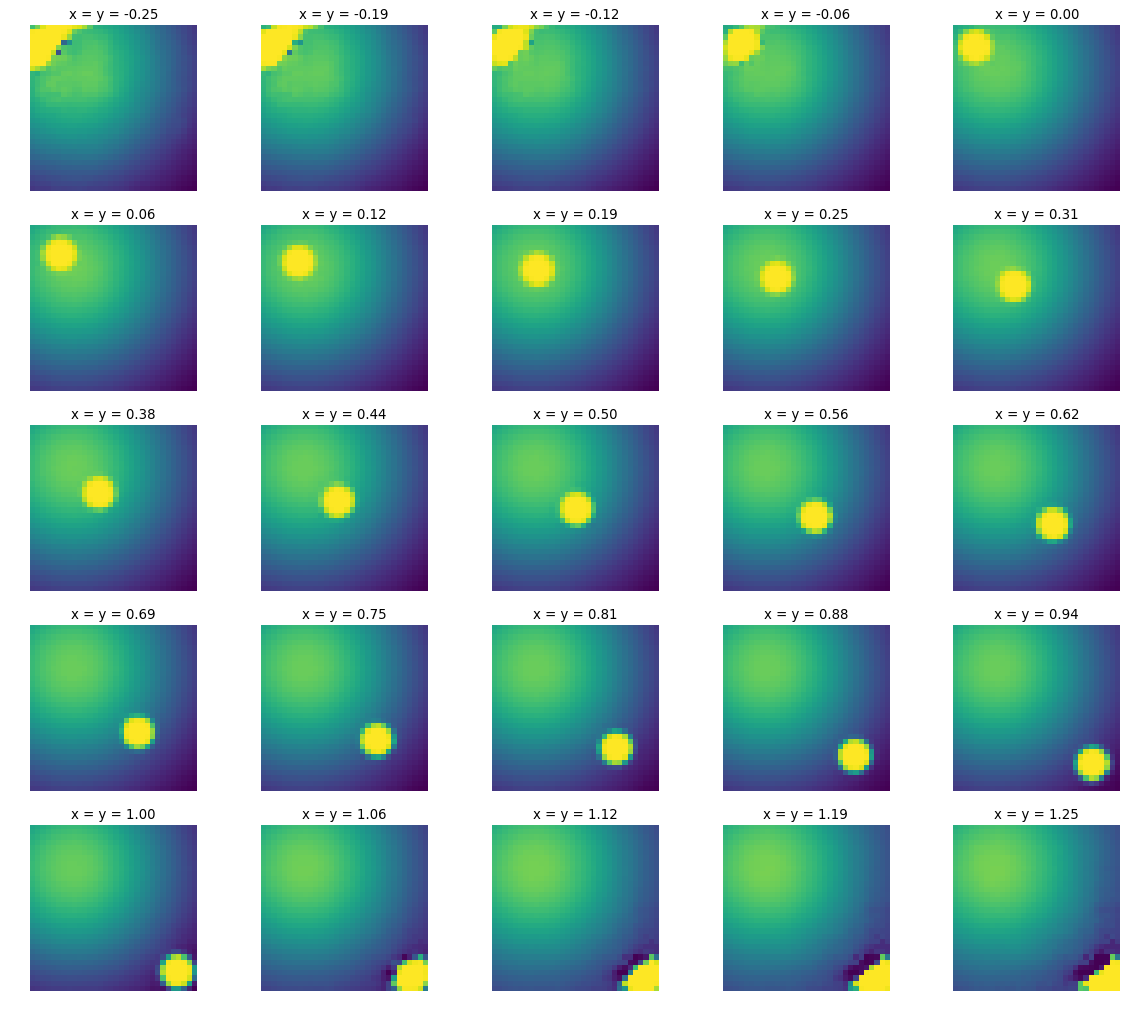

In [21]:
x2 = np.linspace(-.25, 1.25, 25)
y2 = np.linspace(-.25, 1.25, 25)


fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


latents = torch.Tensor(1,4).to(device)
latents[0, 2:] = torch.Tensor([.5, .5])

for ii in range(len(x2)):
        latents[0, :2] = torch.Tensor([x2[ii], y2[ii]])
        
        plt.subplot(5, 5, ii + 1)
        plt.imshow(model(latents).detach().cpu().numpy().squeeze())
        plt.axis('off')
        plt.title('x = y = %0.2f' % x2[ii])